In [ ]:
#preliminary analysis (based on DataFrame)
# 1.info
# 2.describe() 
# 3.univariate (continuous/categorical)
# 4.correlation
# 5.plots

In [ ]:
#data preparation

In [10]:
import pandas as pd
import numpy as np

#*****scaling data for standardisation*****#
from sklearn import preprocessing

#*****spliting data for train vs test*****#
from sklearn.model_selection import train_test_split,KFold, cross_val_score

#*****feature selection*****#
from sklearn.feature_selection import RFE

#******models*****#
from sklearn import linear_model
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm


#*****metrics for evaluating models*****#
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,roc_auc_score


#*****graphs*********#
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import seaborn as sn

In [11]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [15]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 

In [16]:
X=bank_marketing.data.features
y=bank_marketing.data.targets
total=pd.concat([X,y],axis=1)

In [17]:
X.info()
#check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [84]:
#replace NaN with 'na'
total= total.replace(np.nan,'na')

In [74]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [118]:
y.groupby('y').size() 

y
no     39922
yes     5289
dtype: int64

In [22]:
X.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
total.loc[total['y']=='no','outcome']=0
total.loc[total['y']=='yes','outcome']=1

In [125]:
total.corr()

,age,balance,day_of_week,duration,campaign,pdays,previous,outcome
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day_of_week,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
outcome,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


In [123]:
total.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day_of_week', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y', 'outcome',
       'bal_fine_bins', 'dur_fine_bins', 'age_fine_bins'], dtype=object)

In [126]:
total.groupby('job',dropna=False).agg({'outcome':['count','mean']}) 
test=total.groupby('job',dropna=False).agg({'outcome':['count','mean']}) 
test.loc[:,'yes_dist']=test['outcome','count']*test['outcome','mean']/(test['outcome','count']*test['outcome','mean']).sum()
test.loc[:,'no_dist']=test['outcome','count']*(1-test['outcome','mean'])/(test['outcome','count']*(1-test['outcome','mean'])).sum()
test.loc[:,'WOE']=np.log(test['no_dist']/test['yes_dist'])
test.loc[:,'IV_m']=(test['no_dist']-test['yes_dist'])*test['WOE']
IV = test['IV_m'].sum()
IV

0.15569729373605942

In [127]:
total.groupby('marital',dropna=False).agg({'outcome':['count','mean']}) 
test=total.groupby('marital',dropna=False).agg({'outcome':['count','mean']}) 
test.loc[:,'yes_dist']=test['outcome','count']*test['outcome','mean']/(test['outcome','count']*test['outcome','mean']).sum()
test.loc[:,'no_dist']=test['outcome','count']*(1-test['outcome','mean'])/(test['outcome','count']*(1-test['outcome','mean'])).sum()
test.loc[:,'WOE']=np.log(test['no_dist']/test['yes_dist'])
test.loc[:,'IV_m']=(test['no_dist']-test['yes_dist'])*test['WOE']
IV = test['IV_m'].sum()
IV

0.04012659014158411

In [129]:
total.groupby('education',dropna=False).agg({'outcome':['count','mean']}) 
test=total.groupby('education',dropna=False).agg({'outcome':['count','mean']}) 
test.loc[:,'yes_dist']=test['outcome','count']*test['outcome','mean']/(test['outcome','count']*test['outcome','mean']).sum()
test.loc[:,'no_dist']=test['outcome','count']*(1-test['outcome','mean'])/(test['outcome','count']*(1-test['outcome','mean'])).sum()
test.loc[:,'WOE']=np.log(test['no_dist']/test['yes_dist'])
test.loc[:,'IV_m']=(test['no_dist']-test['yes_dist'])*test['WOE']
IV = test['IV_m'].sum()
IV

0.050111945864290006

In [130]:
total.groupby('housing',dropna=False).agg({'outcome':['count','mean']}) 
test=total.groupby('housing',dropna=False).agg({'outcome':['count','mean']}) 
test.loc[:,'yes_dist']=test['outcome','count']*test['outcome','mean']/(test['outcome','count']*test['outcome','mean']).sum()
test.loc[:,'no_dist']=test['outcome','count']*(1-test['outcome','mean'])/(test['outcome','count']*(1-test['outcome','mean'])).sum()
test.loc[:,'WOE']=np.log(test['no_dist']/test['yes_dist'])
test.loc[:,'IV_m']=(test['no_dist']-test['yes_dist'])*test['WOE']
IV = test['IV_m'].sum()
IV

0.18868148327336776

In [131]:
total.groupby('loan',dropna=False).agg({'outcome':['count','mean']}) 
test=total.groupby('loan',dropna=False).agg({'outcome':['count','mean']}) 
test.loc[:,'yes_dist']=test['outcome','count']*test['outcome','mean']/(test['outcome','count']*test['outcome','mean']).sum()
test.loc[:,'no_dist']=test['outcome','count']*(1-test['outcome','mean'])/(test['outcome','count']*(1-test['outcome','mean'])).sum()
test.loc[:,'WOE']=np.log(test['no_dist']/test['yes_dist'])
test.loc[:,'IV_m']=(test['no_dist']-test['yes_dist'])*test['WOE']
IV = test['IV_m'].sum()
IV

0.054858526982233244

In [132]:
total.groupby('contact',dropna=False).agg({'outcome':['count','mean']}) 
test=total.groupby('contact',dropna=False).agg({'outcome':['count','mean']}) 
test.loc[:,'yes_dist']=test['outcome','count']*test['outcome','mean']/(test['outcome','count']*test['outcome','mean']).sum()
test.loc[:,'no_dist']=test['outcome','count']*(1-test['outcome','mean'])/(test['outcome','count']*(1-test['outcome','mean'])).sum()
test.loc[:,'WOE']=np.log(test['no_dist']/test['yes_dist'])
test.loc[:,'IV_m']=(test['no_dist']-test['yes_dist'])*test['WOE']
IV = test['IV_m'].sum()
IV

0.30039610325129745

In [133]:
total.groupby('month',dropna=False).agg({'outcome':['count','mean']}) 
test=total.groupby('month',dropna=False).agg({'outcome':['count','mean']}) 
test.loc[:,'yes_dist']=test['outcome','count']*test['outcome','mean']/(test['outcome','count']*test['outcome','mean']).sum()
test.loc[:,'no_dist']=test['outcome','count']*(1-test['outcome','mean'])/(test['outcome','count']*(1-test['outcome','mean'])).sum()
test.loc[:,'WOE']=np.log(test['no_dist']/test['yes_dist'])
test.loc[:,'IV_m']=(test['no_dist']-test['yes_dist'])*test['WOE']
IV = test['IV_m'].sum()
IV

0.4361311280681517

In [134]:
total.groupby('poutcome',dropna=False).agg({'outcome':['count','mean']}) 
test=total.groupby('poutcome',dropna=False).agg({'outcome':['count','mean']}) 
test.loc[:,'yes_dist']=test['outcome','count']*test['outcome','mean']/(test['outcome','count']*test['outcome','mean']).sum()
test.loc[:,'no_dist']=test['outcome','count']*(1-test['outcome','mean'])/(test['outcome','count']*(1-test['outcome','mean'])).sum()
test.loc[:,'WOE']=np.log(test['no_dist']/test['yes_dist'])
test.loc[:,'IV_m']=(test['no_dist']-test['yes_dist'])*test['WOE']
IV = test['IV_m'].sum()
IV

0.5146091166546641

In [135]:
labels=['A','B','C','D','E','F','G','H','I','J']
total['age_fine_bins']=pd.qcut(total['age'],q=10,labels=labels)

In [136]:
test=total.groupby('age_fine_bins').agg({'outcome':['count','mean']}) 

In [137]:
test.loc[:,'yes_dist']=test['outcome','count']*test['outcome','mean']/(test['outcome','count']*test['outcome','mean']).sum()
test.loc[:,'no_dist']=test['outcome','count']*(1-test['outcome','mean'])/(test['outcome','count']*(1-test['outcome','mean'])).sum()
test.loc[:,'WOE']=np.log(test['no_dist']/test['yes_dist'])
test.loc[:,'IV_m']=(test['no_dist']-test['yes_dist'])*test['WOE']
IV = test['IV_m'].sum()
IV

0.1160167951407867

In [138]:
test

outcome            yes_dist   no_dist       WOE      IV_m
                count      mean                                        
age_fine_bins                                                          
A                5273  0.175991  0.175458  0.108837 -0.477549  0.031815
B                5838  0.110312  0.121762  0.130104  0.066262  0.000553
C                3902  0.104562  0.077141  0.087521  0.126237  0.001310
D                3700  0.109189  0.076385  0.082561  0.077752  0.000480
E                4649  0.098301  0.086406  0.105005  0.194951  0.003626
F                3888  0.089249  0.065608  0.088698  0.301541  0.006963
G                4688  0.089590  0.079410  0.106908  0.297348  0.008177
H                4954  0.089826  0.084137  0.112945  0.294458  0.008483
I                4197  0.094830  0.075251  0.095161  0.234743  0.004674
J                4122  0.203299  0.158442  0.082260 -0.655499  0.049937

In [139]:
labels=['A','B','C','D','E','F','G','H','I','J']
total['bal_fine_bins']=pd.qcut(total['balance'],q=10,labels=labels)

In [140]:
test=total.groupby('bal_fine_bins').agg({'outcome':['count','mean']})

In [141]:
test.loc[:,'yes_dist']=test['outcome','count']*test['outcome','mean']/(test['outcome','count']*test['outcome','mean']).sum()
test.loc[:,'no_dist']=test['outcome','count']*(1-test['outcome','mean'])/(test['outcome','count']*(1-test['outcome','mean'])).sum()
test.loc[:,'WOE']=np.log(test['no_dist']/test['yes_dist'])
test.loc[:,'IV_m']=(test['no_dist']-test['yes_dist'])*test['WOE']
IV = test['IV_m'].sum()
IV

0.10193860580189254

In [142]:
test

outcome            yes_dist   no_dist       WOE      IV_m
                count      mean                                        
bal_fine_bins                                                          
A                7280  0.068956  0.094914  0.169781  0.581539  0.043538
B                1773  0.072194  0.024201  0.041205  0.532167  0.009049
C                4544  0.091769  0.078843  0.103377  0.270921  0.006647
D                4516  0.108282  0.092456  0.100872  0.087116  0.000733
E                4495  0.114127  0.096994  0.099745  0.027965  0.000077
F                4522  0.120080  0.102666  0.099669 -0.029622  0.000089
G                4526  0.126823  0.108527  0.098993 -0.091951  0.000877
H                4513  0.142477  0.121573  0.096939 -0.226433  0.005578
I                4521  0.166114  0.141993  0.094434 -0.407874  0.019398
J                4521  0.161248  0.137833  0.094985 -0.372323  0.015953

In [143]:
labels=['A','B','C','D','E','F','G','H','I','J']
total['dur_fine_bins']=pd.qcut(total['duration'],q=10,labels=labels)

In [144]:
test=total.groupby('dur_fine_bins').agg({'outcome':['count','mean']})

In [145]:
test.loc[:,'yes_dist']=test['outcome','count']*test['outcome','mean']/(test['outcome','count']*test['outcome','mean']).sum()
test.loc[:,'no_dist']=test['outcome','count']*(1-test['outcome','mean'])/(test['outcome','count']*(1-test['outcome','mean'])).sum()
test.loc[:,'WOE']=np.log(test['no_dist']/test['yes_dist'])
test.loc[:,'IV_m']=(test['no_dist']-test['yes_dist'])*test['WOE']
IV = test['IV_m'].sum()
IV 

1.6105584714093628

In [146]:
test

outcome            yes_dist   no_dist       WOE      IV_m
                count      mean                                        
dur_fine_bins                                                          
A                4529  0.001987  0.001702  0.113221  4.197744  0.468129
B                4576  0.012456  0.010777  0.113196  2.351696  0.240858
C                4495  0.028476  0.024201  0.109388  1.508503  0.128505
D                4564  0.045793  0.039516  0.109088  1.015447  0.070646
E                4496  0.068060  0.057856  0.104955  0.595573  0.028051
F                4531  0.090488  0.077519  0.103226  0.286396  0.007362
G                4517  0.123312  0.105313  0.099193 -0.059864  0.000366
H                4468  0.137869  0.116468  0.096488 -0.188198  0.003760
I                4527  0.208527  0.178484  0.089750 -0.687469  0.061002
J                4508  0.455413  0.388164  0.061495 -1.842474  0.601879

In [41]:
total.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day_of_week', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y', 'outcome'],
      dtype=object)

In [6]:
feature_cols=['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day_of_week', 'month', 'duration',
       'campaign', 'pdays']

In [23]:
feature_cont_cols=  ['age','balance','day_of_week', 'duration','campaign','pdays']
feature_cont=total[feature_cont_cols]

In [24]:
feature_cat=pd.get_dummies(total[['job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month','poutcome']],drop_first=True)

In [28]:
feature_cont_cat=pd.concat([feature_cont,feature_cat],axis=1)

In [29]:
X_train_cont_cat=feature_cont_cat

In [168]:
X_train_cont_cat.columns.values

array(['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_na', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_na', 'contact_telephone',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_na', 'poutcome_other', 'poutcome_success'],
      dtype=object)

In [37]:
feature_names=['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_na', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_na', 'contact_telephone',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_na', 'poutcome_other', 'poutcome_success']
target_names = ['no', 'yes']

In [32]:
total

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [33]:
y_train = total[['y']]

In [173]:
clf_tree = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
clf_tree.fit(X_train_cont_cat, y_train)
y_train_pred=clf_tree.predict(X_train_cont_cat)

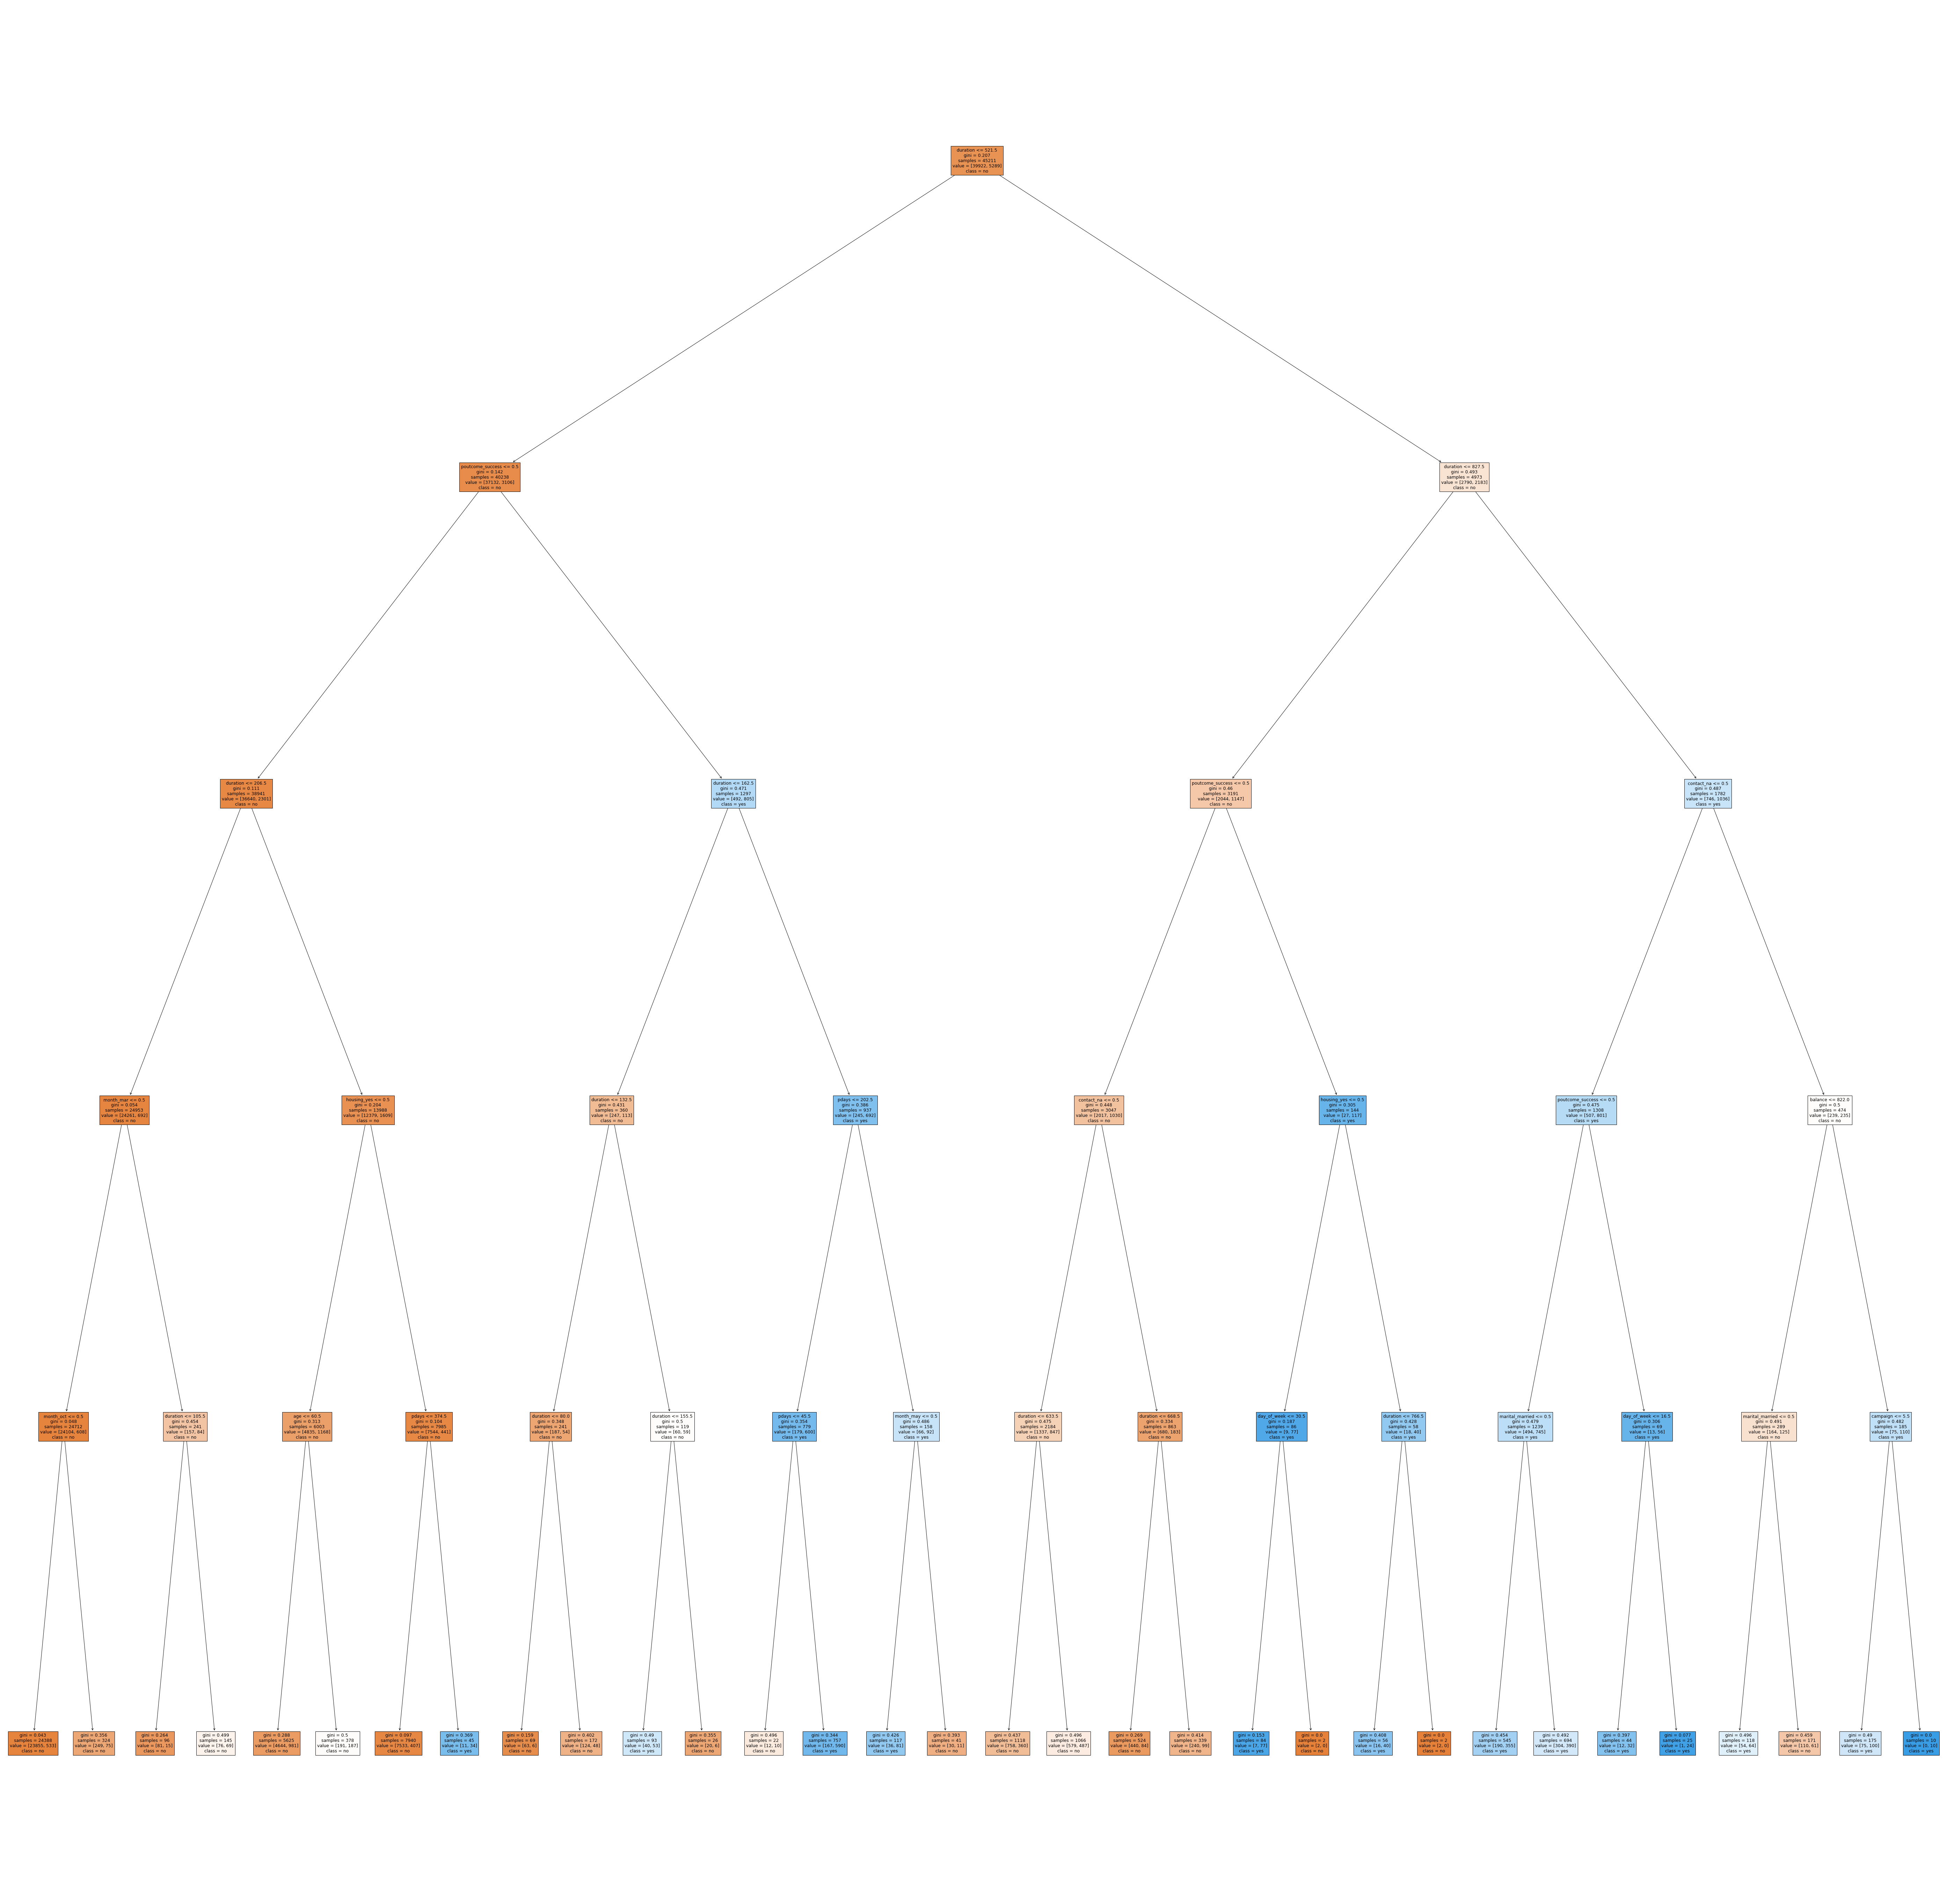

In [172]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(clf_tree, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)

In [174]:
print(classification_report(y_train, y_train_pred, target_names=target_names))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     39922
         yes       0.67      0.35      0.46      5289

    accuracy                           0.90     45211
   macro avg       0.79      0.66      0.70     45211
weighted avg       0.89      0.90      0.89     45211



In [171]:
clf_tree.feature_importances_

#duration,pdays,housing

array([0.02550541, 0.0020794 , 0.0017581 , 0.54830743, 0.00121944,
       0.02041798, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00340196, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04772599, 0.        ,
       0.01673317, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01757887, 0.0038311 ,
       0.        , 0.00986174, 0.        , 0.        , 0.        ,
       0.30157943])

In [175]:
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [19]:
feature_cat = ['age_fine_bins','bal_fine_bins', 'dur_fine_bins','job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month','poutcome']

In [20]:
X_train_cat=pd.get_dummies(total[feature_cat],drop_first=True)

KeyError: "['age_fine_bins', 'bal_fine_bins', 'dur_fine_bins'] not in index"

In [185]:
X_train_cat.columns.values

array(['age_fine_bins_B', 'age_fine_bins_C', 'age_fine_bins_D',
       'age_fine_bins_E', 'age_fine_bins_F', 'age_fine_bins_G',
       'age_fine_bins_H', 'age_fine_bins_I', 'age_fine_bins_J',
       'bal_fine_bins_B', 'bal_fine_bins_C', 'bal_fine_bins_D',
       'bal_fine_bins_E', 'bal_fine_bins_F', 'bal_fine_bins_G',
       'bal_fine_bins_H', 'bal_fine_bins_I', 'bal_fine_bins_J',
       'dur_fine_bins_B', 'dur_fine_bins_C', 'dur_fine_bins_D',
       'dur_fine_bins_E', 'dur_fine_bins_F', 'dur_fine_bins_G',
       'dur_fine_bins_H', 'dur_fine_bins_I', 'dur_fine_bins_J',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_na', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_na', 'contact_telephone',
       'month_a

In [186]:
clf_logr = linear_model.LogisticRegression(max_iter=1000)
clf_rfe = RFE(clf_logr)
clf_rfe.fit(X_train_cat,y_train)
y_train_rfe_pred=clf_rfe.predict(X_train_cat)

/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [188]:
clf_rfe.n_features_

31

In [189]:
clf_rfe.n_features_in_

62

In [191]:
clf_rfe.feature_names_in_

array(['age_fine_bins_B', 'age_fine_bins_C', 'age_fine_bins_D',
       'age_fine_bins_E', 'age_fine_bins_F', 'age_fine_bins_G',
       'age_fine_bins_H', 'age_fine_bins_I', 'age_fine_bins_J',
       'bal_fine_bins_B', 'bal_fine_bins_C', 'bal_fine_bins_D',
       'bal_fine_bins_E', 'bal_fine_bins_F', 'bal_fine_bins_G',
       'bal_fine_bins_H', 'bal_fine_bins_I', 'bal_fine_bins_J',
       'dur_fine_bins_B', 'dur_fine_bins_C', 'dur_fine_bins_D',
       'dur_fine_bins_E', 'dur_fine_bins_F', 'dur_fine_bins_G',
       'dur_fine_bins_H', 'dur_fine_bins_I', 'dur_fine_bins_J',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_na', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_na', 'contact_telephone',
       'month_a

In [190]:
clf_rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True])

In [174]:
clf_rfe.ranking_

array([18, 19, 17, 15, 10, 16,  8,  4,  1, 14,  1, 12, 11,  1, 13,  5,  3,
        9,  6,  1,  2,  1,  1,  7,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1])

In [182]:
y_train_rfe_pred=clf_rfe.predict(X_train_trans)

In [183]:
compare=pd.concat([pd.DataFrame(y_train_rfe_pred,columns=['pred']),y_train],axis=1)

In [184]:
compare.groupby(['pred','outcome']).size()

pred  outcome
0.0   0.0        39416
      1.0         4827
1.0   0.0          506
      1.0          462
dtype: int64

In [185]:
confusion_matrix(y_train,y_train_rfe_pred)

array([[39416,   506],
       [ 4827,   462]])

In [192]:
print(classification_report(y_train, y_train_rfe_pred, target_names=target_names))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94     39922
         yes       0.62      0.34      0.44      5289

    accuracy                           0.90     45211
   macro avg       0.77      0.66      0.69     45211
weighted avg       0.88      0.90      0.89     45211



In [193]:
metrics.roc_auc_score(y_train,y_train_rfe_pred)

0.6560094841397522

In [205]:
feature_cat = ['age_fine_bins','bal_fine_bins', 'dur_fine_bins','job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact','month','poutcome']

In [206]:
X_train_cat=pd.get_dummies(total[feature_cat],drop_first=True)

In [207]:
X_train_cat.columns.values

array(['age_fine_bins_B', 'age_fine_bins_C', 'age_fine_bins_D',
       'age_fine_bins_E', 'age_fine_bins_F', 'age_fine_bins_G',
       'age_fine_bins_H', 'age_fine_bins_I', 'age_fine_bins_J',
       'bal_fine_bins_B', 'bal_fine_bins_C', 'bal_fine_bins_D',
       'bal_fine_bins_E', 'bal_fine_bins_F', 'bal_fine_bins_G',
       'bal_fine_bins_H', 'bal_fine_bins_I', 'bal_fine_bins_J',
       'dur_fine_bins_B', 'dur_fine_bins_C', 'dur_fine_bins_D',
       'dur_fine_bins_E', 'dur_fine_bins_F', 'dur_fine_bins_G',
       'dur_fine_bins_H', 'dur_fine_bins_I', 'dur_fine_bins_J',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_na', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_na', 'contact_telephone',
       'month_a

In [210]:
clf_logr = linear_model.LogisticRegression(max_iter=1000)
clf_logr.fit(X_train_cat,y_train)
y_train_logr_pred=clf_logr.predict(X_train_cat)
y_train_logr_proba=clf_logr.predict_proba(X_train_cat)

/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [209]:
metrics.roc_auc_score(y_train,y_train_logr_pred)

0.6641581164571728

In [211]:
y_train_logr_proba

array([[9.67812346e-01, 3.21876544e-02],
       [9.90132956e-01, 9.86704369e-03],
       [9.99390301e-01, 6.09698548e-04],
       ...,
       [4.71429506e-02, 9.52857049e-01],
       [8.35594309e-01, 1.64405691e-01],
       [8.82563783e-01, 1.17436217e-01]])

In [213]:
df_y_train_logr_proba=pd.DataFrame(y_train_logr_proba[:,-1],columns=['proba'])

In [217]:
df_y_train_logr_proba['proba']

0        0.032188
1        0.009867
2        0.000610
3        0.002765
4        0.014917
           ...   
45206    0.534882
45207    0.282382
45208    0.952857
45209    0.164406
45210    0.117436
Name: proba, Length: 45211, dtype: float64

In [219]:
np.sort(df_y_train_logr_proba['proba'],descending)

array([3.78286441e-04, 3.99064286e-04, 4.69770608e-04, ...,
       9.91908340e-01, 9.92628186e-01, 9.95801030e-01])

In [223]:
df_y_train_logr_proba.sort_values('proba',ascending=False)

,proba
41917,0.995801
43257,0.992628
41585,0.991908
44912,0.991908
45072,0.991475
...,...
5550,0.000512
44600,0.000511
4497,0.000470
6970,0.000399


In [1]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=3)

In [34]:
clf.fit(X_train_cont_cat, y_train)

/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [35]:
y_KN_pred = clf.predict(X_train_cont_cat)

In [38]:
print(classification_report(y_train, y_KN_pred, target_names=target_names))

              precision    recall  f1-score   support

          no       0.94      0.98      0.96     39922
         yes       0.76      0.51      0.61      5289

    accuracy                           0.92     45211
   macro avg       0.85      0.75      0.79     45211
weighted avg       0.92      0.92      0.92     45211

